<a href="https://colab.research.google.com/github/BehzadBarati/Ingredient-Maps/blob/main/Tomato_Recipes_RecipeNLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Behzad Barati

Abstract:

*   This notebook produces SQL tables for working with 174 'tomato soup" recipies of RecipeNLG dataset.
*   RecipeNLG dataset is composed of Recipe1M dataset and other recipes which were added by RecipeNLG authors.
___
Source:

My main refrences are [RecipeNLG paper](https://www.aclweb.org/anthology/2020.inlg-1.4.pdf) and its [dataset](https://recipenlg.cs.put.poznan.pl).
___
Input: 

1- Dataset of [RecipeNLG](https://recipenlg.cs.put.poznan.pl)

Ouput:

1- EDA report on recipe_totmato dataset (including "EDA-Report-recipe-tomato.html" file, word cloud pictures and list of source websites of recipies as "Websites-RecipeNLG.csv" file)

2- recipe_tomato

3- ner_tomato

4- step_tomato

5- recipe_ner_associate_tomato

6- recipe_step_associate_tomato
___
Hints:

1_ As our csv file is greater than 2 gigabytes, I prefer to use cloud services(here google colab). I uploaded RecipeNLG dataset in my [google drive](https://drive.google.com/drive/folders/1g1ZNYKlLN4hyP8ywHXWa2Iu1oQ4wxSgR?usp=sharing). It is public.


2_ If there is out of memory error in running "ProfileReport", please first re-install latest version of "pandas_profiling" library, then try "minimal=True" argument in "profileReport" for eliminating some calculations. (pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)

# Import needed libraries

In [1]:
# Install pandas_profiling library

import numpy as np
import pandas as pd
from wordcloud import WordCloud             # Make wordcloud pictures
from pandas_profiling import ProfileReport  # Generate brief report on our dataframe
import matplotlib.pyplot as plt
from google.colab import drive              # Mount google drive to colab notebook
import re                                   
import string                               # removing special characters
from pandas.core.common import flatten      # to make nested lists flat

In [2]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Load data

In [3]:
# Mount google drive to colab notebook
# Our dataset will be read as recipe_tomato.

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/Projects/Ingredient-Maps/Phase1

/content/gdrive/MyDrive/Projects/Ingredient-Maps/Phase1


In [5]:
# Reading file and check if data is loaded

recipe_tomato = pd.read_csv('./dataset/RecipeNLG.csv')
print('Number of recipes in dataset: ', len(recipe_tomato))
recipe_tomato.rename(columns={'Unnamed: 0': 'id', 'title': 'tag_value', 'directions': 'steps', 'NER': 'ner'}, inplace=True)
print('last 5 recipes:')
recipe_tomato.tail(5)

Number of recipes in dataset:  2231142
last 5 recipes:


,id,tag_value,ingredients,steps,link,source,ner
2231137,2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."
2231141,2231141,Polpette in Spicy Tomato Sauce,"[""1 pound ground veal"", ""1/2 pound sweet Itali...","[""Preheat the oven to 350."", ""In a bowl, mix t...",www.foodandwine.com/recipes/polpette-spicy-tom...,Recipes1M,"[""ground veal"", ""sausage"", ""bread crumbs"", ""mi..."


# Prprocess recipe_tomato

In [6]:
recipe_tomato['tag_value'] = recipe_tomato['tag_value'].str.casefold()

In [7]:
punctuations = str.maketrans('', '', '!"#$%&\'()*+-./:;<=>?@[\\]^_`{|}~')
recipe_tomato['tag_value'] = recipe_tomato['tag_value'].str.translate(punctuations)

In [8]:
# filter Recipes1M recipes as it seems they have better quality, comapring recipes which their source mentioned as 'Gathered'

recipe_tomato = recipe_tomato[recipe_tomato['tag_value'] == 'tomato soup']
recipe_tomato['tag'] = 'title'

In [9]:
recipe_tomato.head()

,id,tag_value,ingredients,steps,link,source,ner,tag
13437,13437,tomato soup,"[""1 1/2 c. milk"", ""1 can chopped tomatoes"", ""2...","[""Heat milk in one pan."", ""Heat tomatoes, toma...",www.cookbooks.com/Recipe-Details.aspx?id=746714,Gathered,"[""milk"", ""tomatoes"", ""tomato soup"", ""butter"", ...",title
23100,23100,tomato soup,"[""2 1/2 gal. tomato juice"", ""1 bunch celery"", ...","[""Blend green peppers, celery and onions to a ...",www.cookbooks.com/Recipe-Details.aspx?id=1017838,Gathered,"[""tomato juice"", ""celery"", ""salt"", ""pepper"", ""...",title
28145,28145,tomato soup,"[""1 can tomato soup"", ""3/4 can water"", ""1/2 ca...","[""Mix soup, water, tomatoes with juice and sea...",www.cookbooks.com/Recipe-Details.aspx?id=688712,Gathered,"[""tomato soup"", ""water"", ""tomatoes"", ""Italian ...",title
44782,44782,tomato soup,"[""2 c. tomatoes (about 5)"", ""1 onion, chopped""...","[""Cook tomatoes, onion, salt and pepper, cayen...",www.cookbooks.com/Recipe-Details.aspx?id=789122,Gathered,"[""tomatoes"", ""onion"", ""salt"", ""black pepper"", ...",title
61143,61143,tomato soup,"[""1 (46 oz.) can tomato juice"", ""3 beef bouill...","[""Put all in a crock-pot for 3 to 4 hours to r...",www.cookbooks.com/Recipe-Details.aspx?id=292340,Gathered,"[""tomato juice"", ""fresh ground pepper"", ""dashe...",title


## EDA (Exploratory Data Analysis)
I dont want to generate report every time I run it, so EDA, world cloud and website list cells are muted.

In [10]:
'''
# Column 'ID' seems to be useless for EDA section,so I drop it for making our dataset smaller.

recipe_tomato.drop('ID', axis='columns', inplace=True)
'''

"\n# Column 'ID' seems to be useless for EDA section,so I drop it for making our dataset smaller.\n\nrecipe_tomato.drop('ID', axis='columns', inplace=True)\n"

In [11]:
# Generate a quick report from our dataset 

profile = ProfileReport(recipe_tomato)
profile.to_file("EDA-Report-RecipeNLG.html")
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## World clouds

In [12]:
# For creating word clouds, I used WordCloud library which was imported before.

def minimal_wordcloud(df, column):
    """
    Generate a simple wordcloud similar to: 
    https://www.kaggle.com/paultimothymooney/explore-recipe-nlg-dataset/data.
    The only import required is: from wordcloud import WordCloud
    """
    text = str(df[column].values)
    wordcloud = WordCloud().generate(text)
    image = wordcloud.to_image()
    plt.axis("off")
    plt.imshow(image)
    plt.show()


world cloud of contents in column tag_value
tag_value


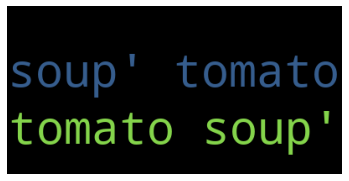


world cloud of contents in column ingredients
ingredients


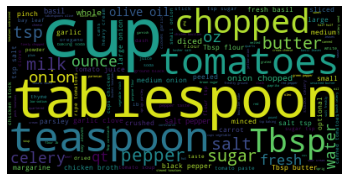


world cloud of contents in column steps
steps


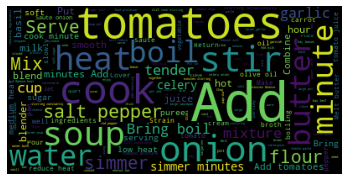


world cloud of contents in column link
link


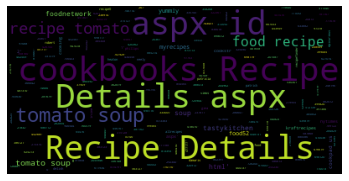


world cloud of contents in column source
source


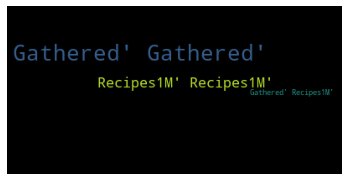


world cloud of contents in column ner
ner


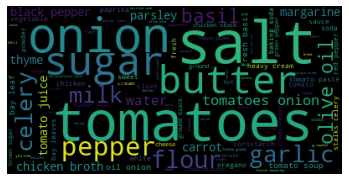


world cloud of contents in column tag
tag


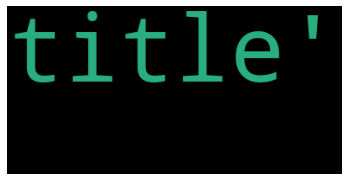

In [13]:
# Print word clouds

for c in recipe_tomato.columns[1:]:
    print('\nworld cloud of contents in column {}'.format(c))
    print(c)
    minimal_wordcloud(recipe_tomato, c)

## preprocess ner column 

In [14]:
# make characters lowercase strictly.
recipe_tomato['ner'] = recipe_tomato['ner'].str.casefold()

In [15]:
# remove punctuations from tag_value and ner columns

recipe_tomato['ner'] = recipe_tomato['ner'].str.translate(punctuations)

In [16]:
# drop rows with no tag_value or ner

recipe_tomato = recipe_tomato[recipe_tomato['tag_value'].notna()]
recipe_tomato = recipe_tomato[recipe_tomato['ner'].notna()]
recipe_tomato = recipe_tomato[recipe_tomato['ner'] != '']

In [17]:
# split ner components to make a list out of them.

recipe_tomato['ner'] = recipe_tomato['ner'].str.split(',')

In [18]:
# remove spaces before/after items of list

recipe_tomato['ner'] = [[val.strip() for val in sublist] for sublist in recipe_tomato['ner'].values]

In [19]:
# I noticed some ner start with "a " (i.e. a milk). so we should remove them.

recipe_tomato['ner'] = [[re.sub('^a ', '', val) for val in sublist] for sublist in recipe_tomato['ner'].values]

In [20]:
# remove spaces before/after items of list once again

recipe_tomato['ner'] = [[val.strip() for val in sublist] for sublist in recipe_tomato['ner'].values]

In [21]:
# remove empty items from lists in ner column

recipe_tomato['ner'] = recipe_tomato['ner'].apply(lambda row: list(filter(None, row)))

In [22]:
# remove items from lists in ner column which are only 1 character (i.e. 'm')

recipe_tomato['ner'] = recipe_tomato['ner'].apply(lambda row: [item for item in row if len(item) > 1] )

In [23]:
# remove duplicates items in each row of ner column

recipe_tomato['ner'] = recipe_tomato['ner'].apply(lambda row: list(set(row)))

In [24]:
# romve recipes where they have less than two ners.

recipe_tomato = recipe_tomato[recipe_tomato['ner'].str.len() > 1]

## preprocess steps column

In [25]:
# split recipe_tomato['steps'] to make a list out of each record.
# since in some steps there are comma, we can not split steps based on it.
# so we split based on " and then remove items which are meaningless (less than 4 charachters)

recipe_tomato['steps'] = recipe_tomato['steps'].str.split('"')
recipe_tomato['steps'] = recipe_tomato['steps'].apply(lambda row: [item for item in row if len(item) > 3] )

In [26]:
# some steps consists multiple sentences which are ended with dot. so we split steps again based on dot.
# by runing split('.), we will get some two dimensional lists and also some blank spaces as items
# so we make steps lists flat and remove items with less 2 characters.
# remove spaces before/after items of list

recipe_tomato['steps'] = [[val.split('.') for val in sublist] for sublist in recipe_tomato['steps'].values]
recipe_tomato['steps'] = recipe_tomato['steps'].apply(lambda row: list(flatten(row)))
recipe_tomato['steps'] = recipe_tomato['steps'].apply(lambda row: [item for item in row if len(item) > 2])
recipe_tomato['steps'] = [[val.strip() for val in sublist] for sublist in recipe_tomato['steps'].values]

In [27]:
# romve recipes where they have less than two steps.

recipe_tomato = recipe_tomato[recipe_tomato['steps'].str.len() > 1]

In [28]:
# reset index due to deleting some rows of recipe_tomato in previous cells. 
# naming convention for recipe_ID column

recipe_tomato.reset_index(inplace=True, drop=True)
recipe_tomato['ID'] = "rec_" + recipe_tomato.index.astype(str)

In [29]:

aaa = recipe_tomato['ner'].explode().value_counts()
aaa.head(30)

tomatoes         132
salt             121
sugar             81
onion             74
butter            72
flour             56
onions            47
garlic            44
celery            43
milk              43
pepper            41
olive oil         29
basil             28
water             27
parsley           22
chicken broth     21
margarine         18
thyme             18
tomato juice      17
bay leaf          15
tomato paste      15
heavy cream       14
fresh basil       14
tomato soup       14
stalks celery     13
bay leaves        12
baking soda       12
soda              12
black pepper      12
cornstarch        12
Name: ner, dtype: int64

# Build ner, step and associated tables

## ner_tomato

In [30]:
# create ner_tomato and add ID column

ner_tomato = pd.DataFrame(recipe_tomato['ner'].explode().unique(), columns=['tag_value'])
ner_tomato['ID'] =  ['ner_'+str(i) for i in range(len(ner_tomato['tag_value']))]
ner_tomato['tag'] = 'ner'

In [31]:
# set index to ner and make conv dictionary out of ner_tomato
# by help of conv dictionary, we replace names in recipe_tomato['ner'] with IDs

ner_tomato.set_index(['tag_value'], inplace=True)
conv = ner_tomato.to_dict('dict')
recipe_tomato['ner'] = recipe_tomato['ner'].apply(lambda row: [conv['ID'][v] for v in row if conv['ID'].get(v)])
ner_tomato.reset_index(inplace=True)

In [32]:
# If we want to have all recipes of each ner as a list, we can run this cell.
'''
# add a column to keep recipe_IDs and reset index in ordet to fill recipe_ID column
# we fill recipe_ID column of ner_tomato with all recipe_IDs used ner in. (~ 4 minutes in colab with 8 GB RAM)

ner_tomato['recipe_ID'] = np.empty((len(ner_tomato), 0)).tolist()
ner_tomato = ner_tomato.reset_index().set_index('ID')

for k in range(len(recipe_tomato)):
    for m in recipe_tomato['ner'][k]:
        ner_tomato['recipe_ID'][m].append(recipe_tomato['ID'][k])


# this is another approach to fill recipe_ID column in ner_tomato. but this is slow. (~ 100 hours for this problem)
import time

ner_tomato['recipe_ID'] = np.empty((len(ner_tomato), 0)).tolist()
for i in range(len(ner_tomato)):
    t0= time.clock()
    for j in range(len(recipe_tomato)):
        if ner_tomato['ID'][i] in recipe_tomato['ner'][j]:
           ner_tomato['recipe_ID'][i].append(recipe_tomato['recipe_ID'][j])
    print(time.clock() - t0)
'''

"\n# add a column to keep recipe_IDs and reset index in ordet to fill recipe_ID column\n# we fill recipe_ID column of ner_tomato with all recipe_IDs used ner in. (~ 4 minutes in colab with 8 GB RAM)\n\nner_tomato['recipe_ID'] = np.empty((len(ner_tomato), 0)).tolist()\nner_tomato = ner_tomato.reset_index().set_index('ID')\n\nfor k in range(len(recipe_tomato)):\n    for m in recipe_tomato['ner'][k]:\n        ner_tomato['recipe_ID'][m].append(recipe_tomato['ID'][k])\n\n\n# this is another approach to fill recipe_ID column in ner_tomato. but this is slow. (~ 100 hours for this problem)\nimport time\n\nner_tomato['recipe_ID'] = np.empty((len(ner_tomato), 0)).tolist()\nfor i in range(len(ner_tomato)):\n    t0= time.clock()\n    for j in range(len(recipe_tomato)):\n        if ner_tomato['ID'][i] in recipe_tomato['ner'][j]:\n           ner_tomato['recipe_ID'][i].append(recipe_tomato['recipe_ID'][j])\n    print(time.clock() - t0)\n"

## step_tomato

In [33]:
# create step_tomato and add step_ID column

step_tomato = pd.DataFrame(recipe_tomato['steps'].explode().unique(), columns=['tag_value'])
step_tomato['ID'] =  ['ste_'+str(i) for i in range(len(step_tomato['tag_value']))]
step_tomato['tag'] = 'step'

In [34]:
# set index to tag_value and make conv dictionary out of step_tomato
# by help of conv dictionary, we replace names in recipe_tomato['steps'] with IDs

step_tomato.set_index(['tag_value'], inplace=True)
conv = step_tomato.to_dict('dict')
recipe_tomato['steps'] = recipe_tomato['steps'].apply(lambda row: [conv['ID'][v] for v in row if conv['ID'].get(v)])
step_tomato.reset_index(inplace=True)

## Associate Tables

In [35]:
# creat associate tables between recipe, ner and step tables

recipe_ner_associate_tomato = recipe_tomato.explode('ner')
recipe_step_associate_tomato = recipe_tomato.explode('steps')

In [36]:
# keep just necessary columns of main tables

recipe_tomato = recipe_tomato[['ID', 'tag', 'tag_value']]
ner_tomato = ner_tomato[['ID', 'tag', 'tag_value']]
step_tomato = step_tomato[['ID', 'tag', 'tag_value']]

In [37]:
# keep just necessary columns of associate tables

recipe_ner_associate_tomato = recipe_ner_associate_tomato[['ID', 'ner']]
recipe_step_associate_tomato = recipe_step_associate_tomato[['ID', 'steps']]

## Final tables and their heads

In [38]:
print(len(recipe_tomato))
recipe_tomato.head()

171


,ID,tag,tag_value
0,rec_0,title,tomato soup
1,rec_1,title,tomato soup
2,rec_2,title,tomato soup
3,rec_3,title,tomato soup
4,rec_4,title,tomato soup


In [39]:
print(len(step_tomato))
step_tomato.head()

1268


,ID,tag,tag_value
0,ste_0,step,Heat milk in one pan
1,ste_1,step,"Heat tomatoes, tomato soup, butter, flour (mix..."
2,ste_2,step,"When hot, add pinch of soda"
3,ste_3,step,"When both milk and tomato mixture are hot, mix..."
4,ste_4,step,"Blend green peppers, celery and onions to a pu..."


In [40]:
print(len(ner_tomato))
ner_tomato.head()

219


,ID,tag,tag_value
0,ner_0,ner,hot sauce
1,ner_1,ner,flour
2,ner_2,ner,milk
3,ner_3,ner,tomato soup
4,ner_4,ner,salt


In [41]:
print(len(recipe_ner_associate_tomato))
recipe_ner_associate_tomato.head()

1473


,ID,ner
0,rec_0,ner_0
0,rec_0,ner_1
0,rec_0,ner_2
0,rec_0,ner_3
0,rec_0,ner_4


In [42]:
print(len(recipe_step_associate_tomato))
recipe_step_associate_tomato.head()

1322


,ID,steps
0,rec_0,ste_0
0,rec_0,ste_1
0,rec_0,ste_2
0,rec_0,ste_3
1,rec_1,ste_4


# Build SQL tables

In [48]:
import sqlite3
conn = sqlite3.connect('tomato.db')

In [44]:
recipe_ner_associate_tomato.to_sql('recipe_ner_associate_tomato', conn, index=False)
recipe_step_associate_tomato.to_sql('recipe_step_associate_tomato', conn, index=False)
recipe_tomato.to_sql('recipe_tomato', conn, index=False)
ner_tomato.to_sql('ner_tomato', conn, index=False)
step_tomato.to_sql('step_tomato', conn, index=False)

In [45]:
# check if our tables are in tomato.db

sql = '''SELECT name FROM sqlite_master WHERE type='table';'''
pd.read_sql(sql, conn)

,name
0,recipe_ner_associate_tomato
1,recipe_step_associate_tomato
2,recipe_tomato
3,ner_tomato
4,step_tomato


In [46]:
# check if tables have content.

sql = '''SELECT * FROM recipe_tomato r WHERE r.ID == 'rec_1';'''
pd.read_sql(sql, conn)

,ID,tag,tag_value
0,rec_1,title,tomato soup
